In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [253]:
data_in = pd.read_csv("car data.csv")

In [254]:
data_in.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


1. Проведите первичный анализ данных

2. Проведите визуальный анализ данных

3. Разбейте данные на обучение и тест

4. Удалите категориальные признаки

5. Сделайте предобработку данных с помощью класса и пайплайна

6. Обучите модель регрессии, с целевым признаком Selling_Price

7. Оцените подходящие метрики качества

8. Сформулируйте выводы по проделанной работе

In [255]:
data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [256]:
data_in.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [257]:
data_in.loc[:,data_in.dtypes == object].describe()

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


1. Данные без пропусков
2. Категориальные признаки: 
- номенативные: Car_Name, Fuel_Type 
- бинарные: Seller_Type, Transmission
- ранговые: Year

3. Численные признаки:

- Selling_Price, Present_Price, Kms_Driven, Owner

<Figure size 720x720 with 0 Axes>

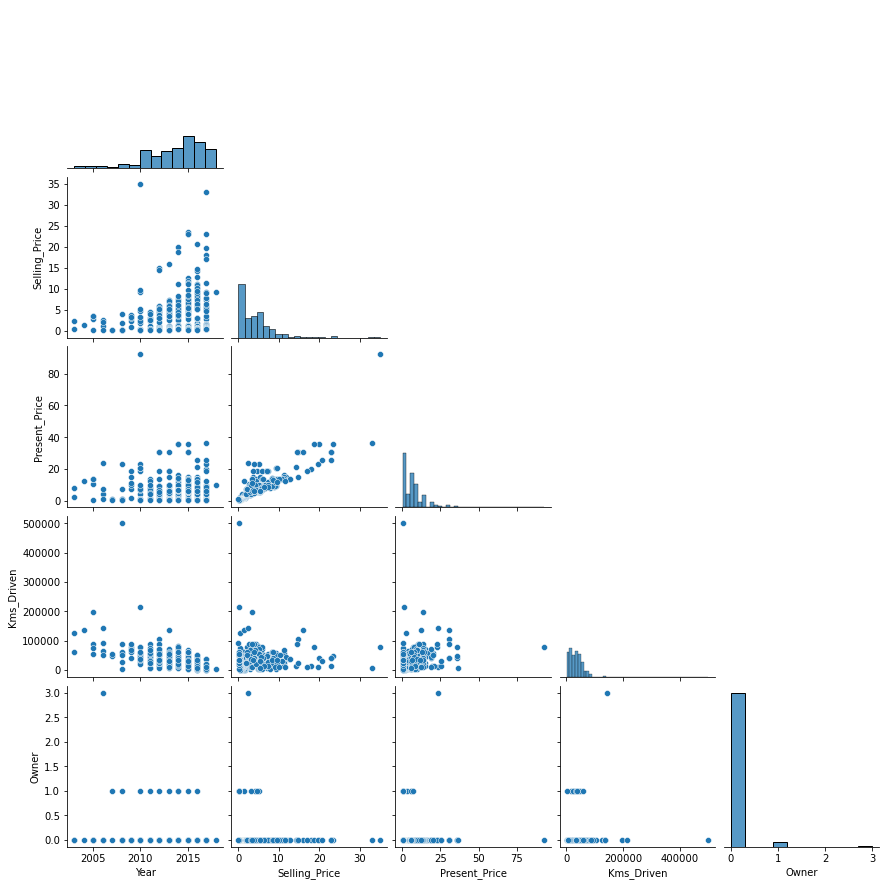

In [258]:
plt.figure(figsize=(10,10))
sns.pairplot(data_in, corner=True)
plt.show()


Уберем категориальные признаки

In [259]:
data_in.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Year', 'Owner'], axis = 1, inplace=True)

разобьем данные на обучение и тест:

In [260]:
X_train, X_test, y_train, y_test = train_test_split(data_in.drop('Selling_Price', axis=1), \
                                                      data_in['Selling_Price'], \
                                                      test_size = 0.25, shuffle=True, \
                                                      random_state=42 )

По графикам видим что есть выбросы.
Подготовим класс для обработки данных:

In [261]:
class MyDataPipeline:
    def __init__(self, data):
        '''При инициализации класса считаем нужные метрики'''
        
        self.data = data
        self.mean = data.mean()
        self.std = data.var()
        
    def transform(self, n=1.5):
        '''Обрезаем выбросы лежащие дальше отметки n стандартных отклонений'''
        self.data = self.data[abs(self.data - self.mean) < self.std * n]
        return self.data
    

In [262]:
pipe1 = MyDataPipeline(X_train)

In [263]:
X_train = pipe1.transform()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 129 to 102
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Present_Price  225 non-null    float64
 1   Kms_Driven     225 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 5.3 KB


Таким образом, получили всего 2 признака для анализа
Рассмотрим их влияние на целевой признак


In [264]:
X_train.join(y_train, how='inner').corr()

,Present_Price,Kms_Driven,Selling_Price
Present_Price,1.000000,0.190772,0.880804
Kms_Driven,0.190772,1.000000,0.032879
Selling_Price,0.880804,0.032879,1.000000


In [265]:
y_train

129     0.78
232    11.45
195     0.18
277     9.70
280     5.25
       ...  
188     0.25
71      4.50
106     1.35
270     4.10
102     1.65
Name: Selling_Price, Length: 225, dtype: float64

In [266]:
scaller = StandardScaler()
scaled_X = scaller.fit_transform(X_train)
scaled_Y = scaller.fit_transform(y_train.values.reshape(-1, 1))

In [267]:
scaled_X

array([[-7.47646853e-01, -7.61473138e-01],
       [ 8.24529863e-01, -5.77291066e-01],
       [-8.06251290e-01, -6.20475467e-02],
       [ 6.90415864e-01, -3.70261091e-01],
       [-1.77380603e-01, -5.40804364e-01],
       [-7.70768557e-02, -1.41222524e-01],
       [ 6.74637746e-01,  3.71895394e+00],
       [ 1.76670888e+00, -6.21588020e-01],
       [-3.23891695e-01,  3.68332334e-01],
       [-7.81457105e-01, -8.66386977e-01],
       [-6.28183963e-01, -7.52147463e-01],
       [ 5.70371437e-02,  8.81424420e-02],
       [-7.88219155e-01,  2.87665249e-01],
       [ 2.60745715e+00,  1.19691852e+00],
       [-6.76645324e-01, -4.81702901e-01],
       [-7.76949072e-01, -8.33747116e-01],
       [ 1.25504707e+00,  4.27573681e-01],
       [ 3.73726504e-01,  1.24465944e-01],
       [-4.36592535e-01, -8.28268282e-01],
       [-7.83711122e-01,  1.07790491e+01],
       [ 3.97393680e-01,  1.17206560e+00],
       [ 7.06193982e-01,  1.17360433e+00],
       [-1.99920771e-01, -3.02696578e-01],
       [-5.

In [268]:
model = LinearRegression()

In [269]:
model = model.fit(scaled_X, scaled_Y)

In [270]:
model.score(scaled_X, scaled_Y)

0.7947717258307869

In [271]:
testX_scalled = scaller.fit_transform(X_test)
testY_scalled = scaller.fit_transform(y_test.values.reshape(-1, 1))

In [272]:
model.score(testX_scalled, testY_scalled)

0.8339175769494761

In [273]:
model.coef_

array([[ 0.90756111, -0.14025807]])

In [274]:
model.intercept_

array([-1.62541532e-17])

In [275]:
predict = scaller.inverse_transform(model.predict(testX_scalled))

In [278]:
y_test.values

array([ 0.35, 10.11,  4.95,  0.15,  6.95,  7.45,  1.1 ,  0.5 ,  0.45,
        6.  ,  9.25,  1.1 ,  7.5 ,  0.4 ,  6.15,  2.65,  0.95, 17.  ,
        0.48,  1.7 ,  0.42,  8.35,  5.35,  3.  ,  0.6 ,  3.75,  5.  ,
        2.65,  1.2 ,  1.2 ,  0.65,  8.25,  0.45,  1.95,  7.75,  3.65,
        5.5 ,  3.8 ,  2.9 ,  4.75,  3.51,  1.5 ,  4.5 ,  0.42,  6.5 ,
        0.6 ,  6.25,  5.25,  4.  ,  3.1 ,  5.11,  1.35, 23.5 , 23.  ,
        8.25, 10.9 ,  5.5 ,  9.5 ,  2.1 ,  7.4 ,  0.3 ,  0.25,  0.75,
        0.2 ,  3.95,  1.15, 19.99, 23.  ,  6.75,  0.38,  3.1 ,  4.4 ,
        5.65,  4.5 ,  2.  ,  1.15])

In [279]:
predict = pd.DataFrame(predict, columns = ['predict'])

In [281]:
predict['real_y'] = y_test.values

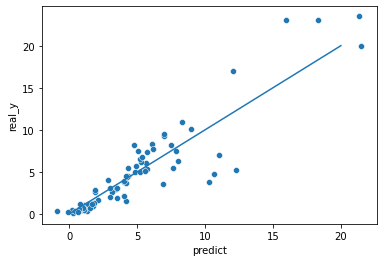

In [298]:

sns.scatterplot(data=predict, x='predict', y='real_y')
sns.lineplot(x = [0, 20], y=[0, 20])
plt.show()

Из финального графика сопоставления видно, что модель хорошо работает до цены 10, далее получаем высокую погрешность предсказаний